### The dataset contains several parameters which are considered important during the application for Masters programs. The parameters included are:

GRE score(out of 340)

TOEFL score(out of 120)

University rating(out of 5)

Statement of purpose and letter of recommendation strength - SOP & LOR(out of 5)

Undergraduate GPA(out of 10)

Research experience(either 0 or 1)

Chance of admit(ranging from 0 to 1)

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the data

In [2]:
adm_data = pd.read_csv('Admission_Predict.csv')

In [3]:
adm_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory data analysis

In [4]:
adm_data.shape

(400, 9)

In [5]:
adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
adm_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
# dataset is very clean, no missing values at all
adm_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# drop irrelevant column
adm_data = adm_data.drop('Serial No.', axis=1)


In [9]:
adm_data.columns.values

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Chance of Admit '], dtype=object)

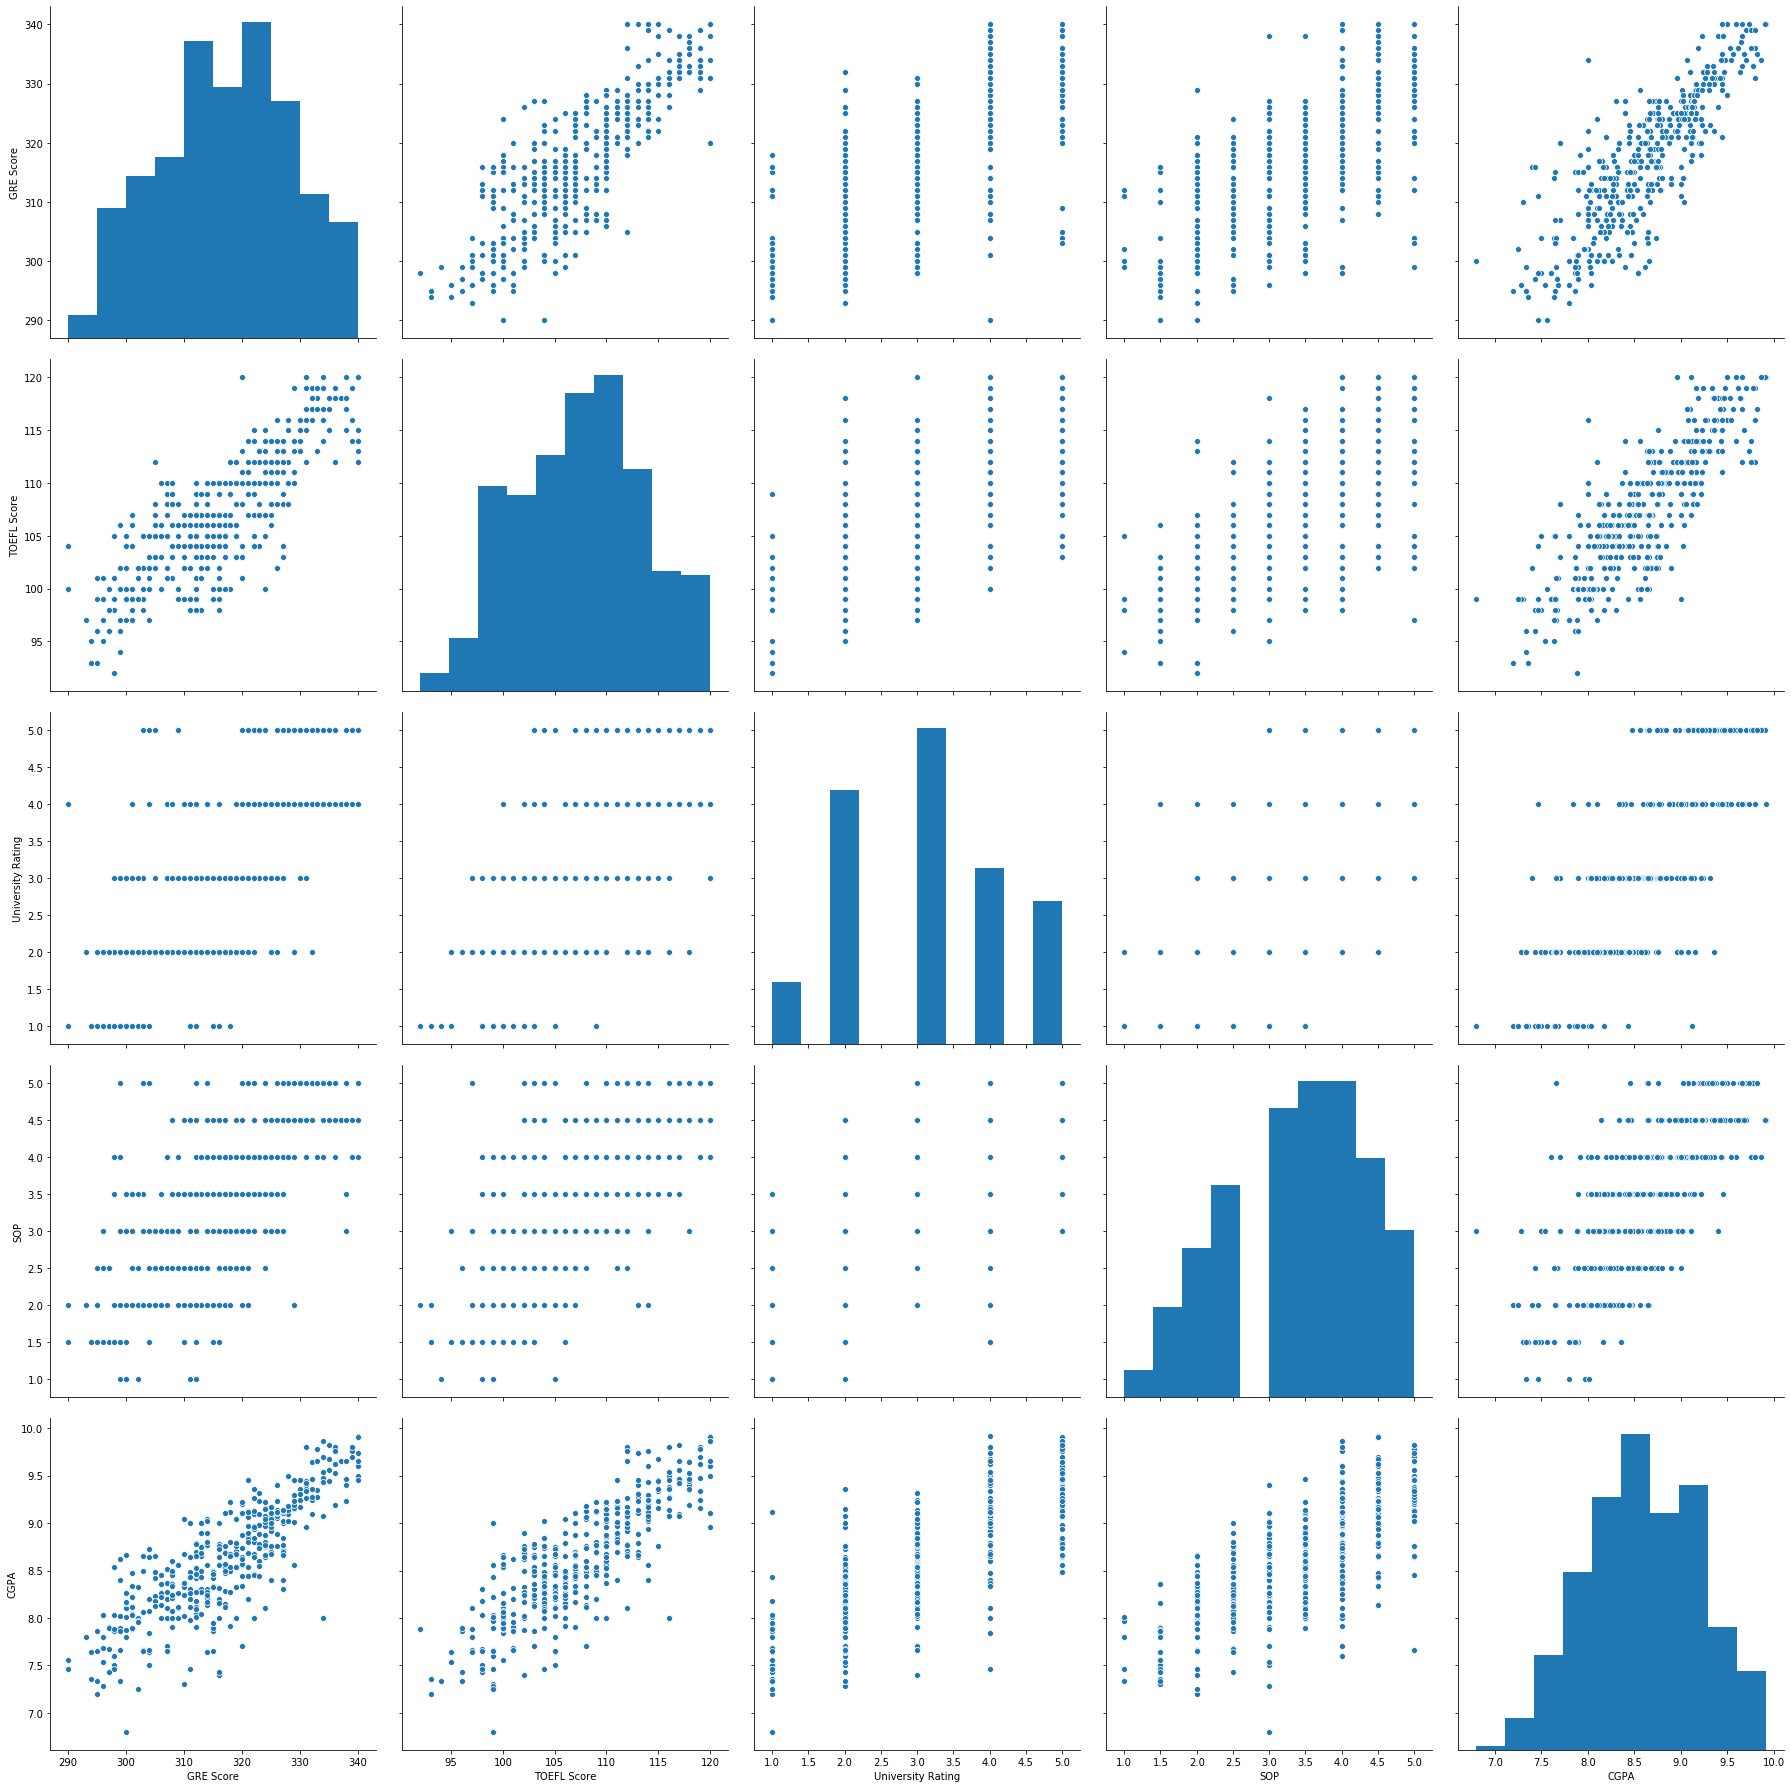

In [10]:
sns.pairplot(adm_data[['GRE Score','TOEFL Score','University Rating','SOP','CGPA']], height=5)

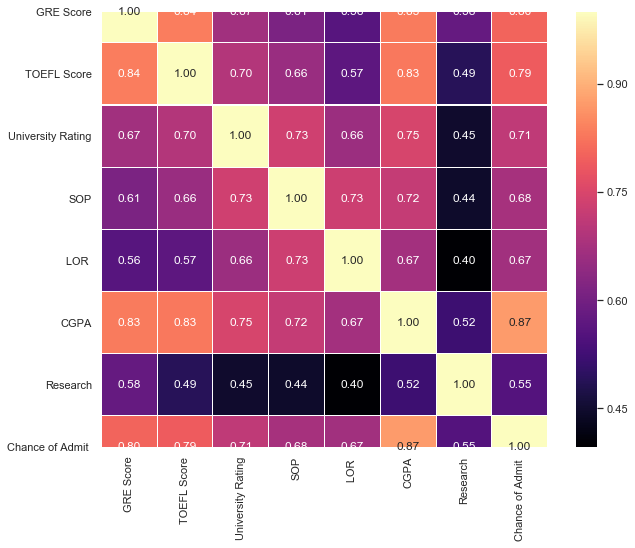

In [11]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(adm_data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

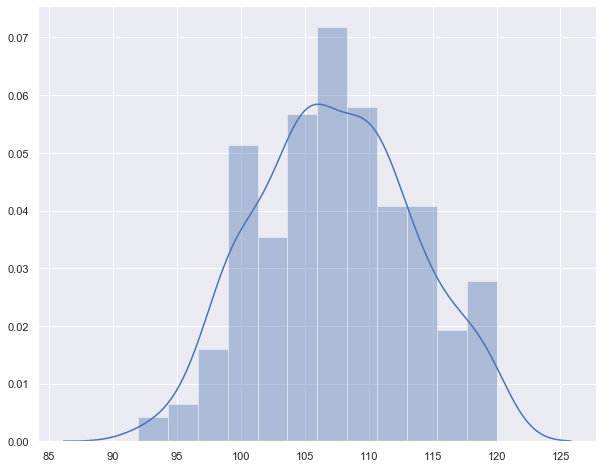

In [12]:
x = adm_data['TOEFL Score'].values 
sns.distplot(x)

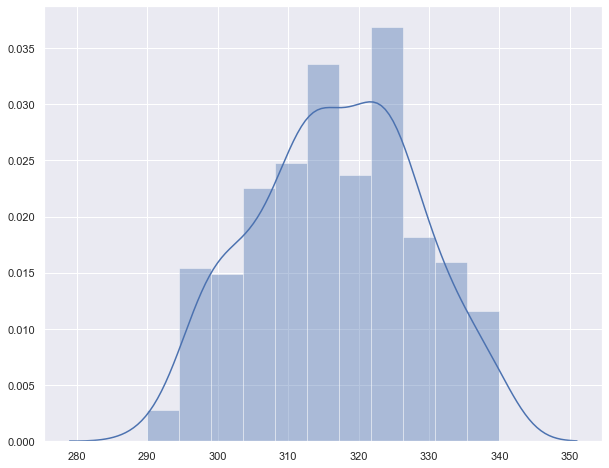

In [13]:
x = adm_data['GRE Score'].values 
sns.distplot(x)

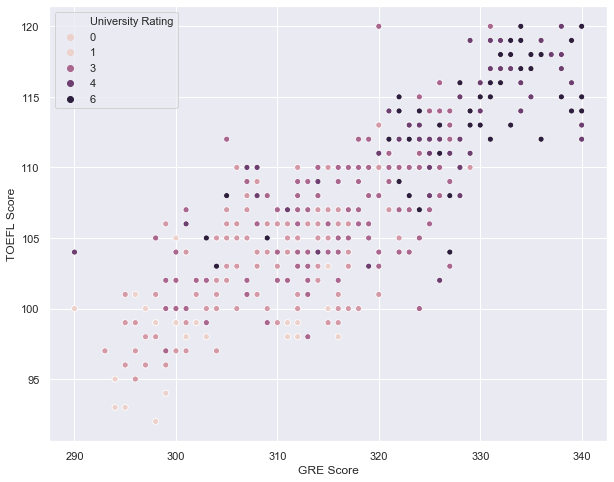

In [14]:

sns.scatterplot(x='GRE Score', y='TOEFL Score', data=adm_data, hue='University Rating')

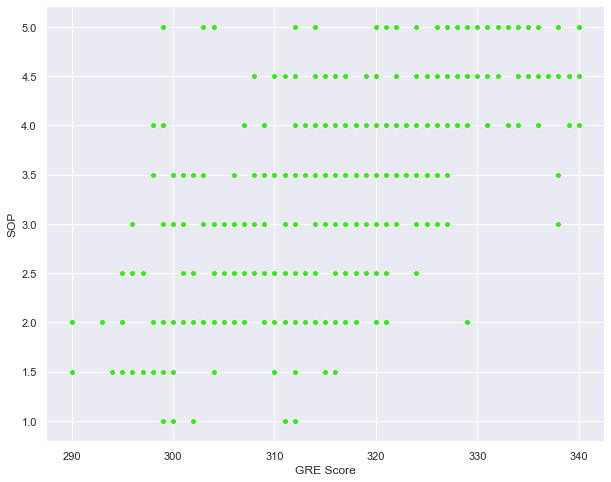

In [15]:
sns.scatterplot(x='GRE Score', y='SOP', data=adm_data, color='#3DE423')

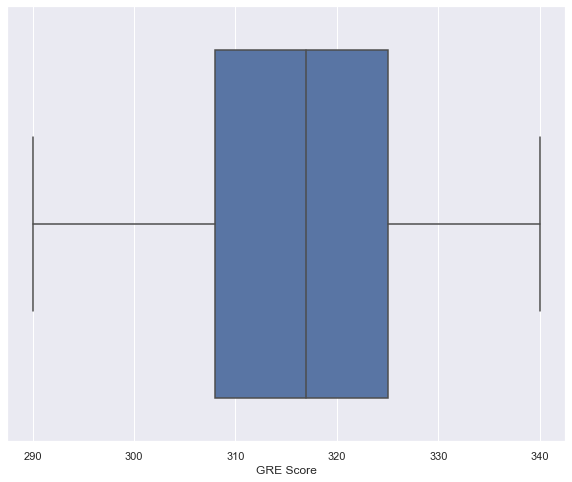

In [16]:
# no outliers
sns.boxplot('GRE Score', data=adm_data)

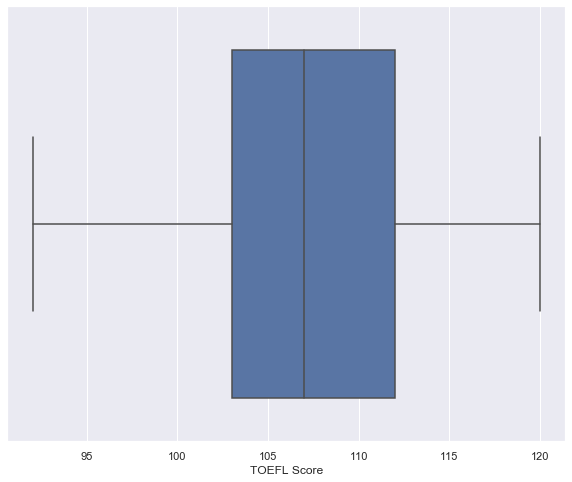

In [17]:
# no outliers
sns.boxplot('TOEFL Score', data=adm_data)

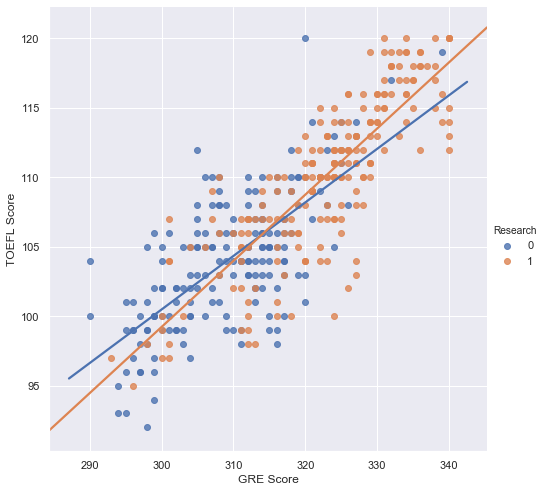

In [18]:
sns.lmplot(x='GRE Score', y='TOEFL Score', data=adm_data, height=7, hue='Research', ci=False)

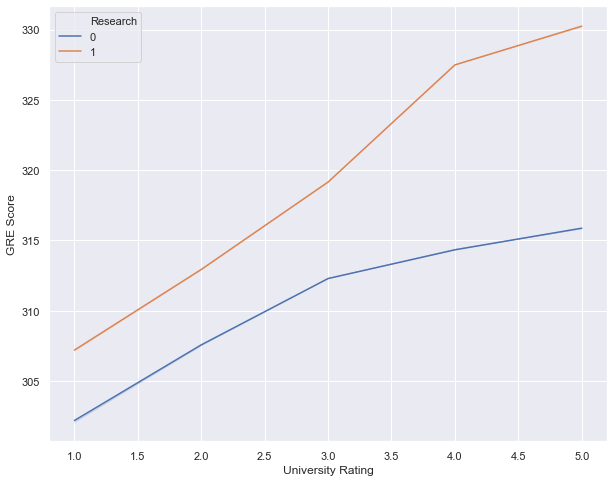

In [19]:
sns.lineplot(x='University Rating', y='GRE Score', data=adm_data, hue='Research', ci=False)

## Select the inputs and targets

In [20]:
adm_data.iloc[:, :-1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [21]:
unscaled_adm_data = adm_data.iloc[:, :-1]
targets = np.where(adm_data['Chance of Admit '] > adm_data['Chance of Admit '].mean(), 1, 0)

## Standardize the data

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(unscaled_adm_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_inputs = scaler.transform(unscaled_adm_data)
scaled_inputs

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

## Split the data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size=0.8, random_state=42)

## Logistic regression

In [26]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print('Training data accuracy:', round(reg.score(x_train, y_train),2))

Training data accuracy: 0.86


In [28]:
print('Testing data accuracy:', round(reg.score(x_test, y_test),2))

Testing data accuracy: 0.96


In [29]:
reg.intercept_

array([0.25520019])

In [30]:
reg.coef_

array([[0.69188754, 0.11672862, 0.40034978, 0.34276492, 0.30141082,
        1.4703494 , 0.53497312]])